In [1]:
import numpy as np
noise = np.random.randn(100, 1)
X = 2 * np.random.rand(100, 1)
y = 3 * X + 4+noise

In [2]:
import matplotlib.pyplot as plt

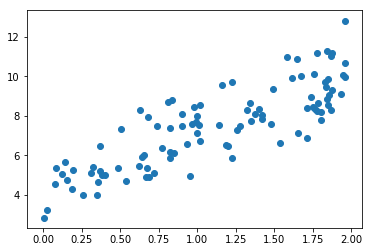

In [3]:
plt.scatter(X,y)
plt.show()

# Normal equation
Screen Shot 2017-11-12 at 10.58.26 AM.png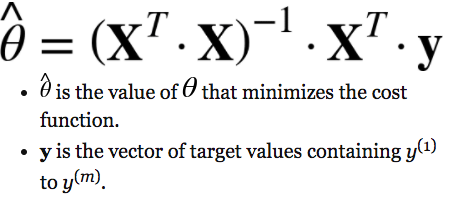

In [4]:
X_b = np.c_[np.ones((100, 1)), X] 

In [5]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
def normal_eqt():
    X_b = np.c_[np.ones((100, 1)), X] #add one for the bias
    theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return theta_best

In [7]:
theta_best

array([[ 4.25878901],
       [ 2.89176996]])

In [8]:
#Prediction
P_ = np.array([[4],[3],[9]])
P = np.c_[np.ones((3,1)),P_]


In [9]:
np.shape(P)

(3, 2)

In [10]:
np.shape(theta_best)

(2, 1)

In [11]:
pred_y = theta_best.T.dot(P.T)
true_y = 3 * P_ + 4

In [12]:
pred_y

array([[ 15.82586886,  12.93409889,  30.28471866]])

In [13]:
true_y

array([[16],
       [13],
       [31]])

# Gradient Decent

Screen Shot 2017-11-12 at 10.59.47 AM.png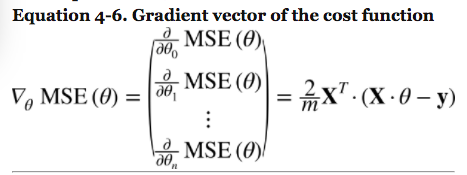

Screen Shot 2017-11-12 at 11.00.51 AM.png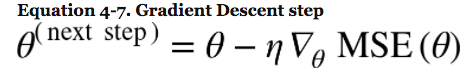

In [14]:
#learning rate
def gradientdecent():
    eta=0.1
    n_iterations = 1000
    m = 100

    theta = np.random.randn(2,1)  # random initialization

    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients

In [15]:
gradientdecent()

# Stochastic Gradient Decent (SGD)

In [16]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters
m = len(X_b)
def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [17]:
theta

array([[ 4.23595366],
       [ 2.95208656]])

In [18]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.reshape(-1))

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=50, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [19]:
print("{0},{1}".format(sgd_reg.coef_[0],sgd_reg.intercept_[0]))

2.8054948688347743,4.18217857119729


# MiniBatch Gradient Decent (SGD)

In [20]:
n_epochs = 1000
t0, t1 = 10, 1000  # learning schedule hyperparameters
miniBatchSize=20
m = len(X_b)
def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    shuffledIndices=np.random.permutation(m)
    for i in range(0,m,miniBatchSize):
        random_index = np.random.randint(m)
        xi = X_b[shuffledIndices[i*miniBatchSize:i*miniBatchSize+miniBatchSize]]
        yi = y[shuffledIndices[i*miniBatchSize:i*miniBatchSize+miniBatchSize]]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [21]:
theta

array([[ 4.04739214],
       [ 3.06229729]])

# Polynomial regression

In [22]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [23]:
from sklearn.preprocessing import PolynomialFeatures

In [24]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [25]:
X_poly = poly_features.fit_transform(X)

In [26]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=100, penalty=None, eta0=0.1)
sgd_reg.fit(X_poly, y.reshape(-1))

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=100, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [27]:
sgd_reg.coef_

array([ 1.03736121,  0.49566915])

In [28]:
sgd_reg.intercept_

array([ 1.74694916])

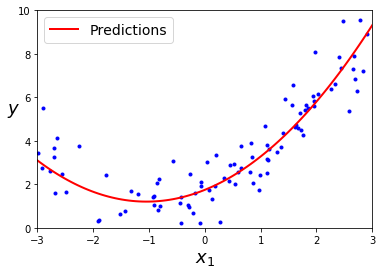

In [29]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = sgd_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])

plt.show()

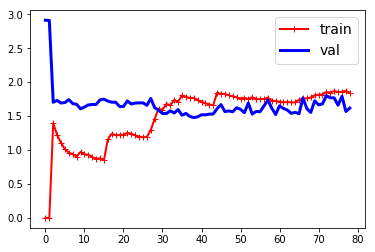

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.show()
sgd_model = SGDRegressor(n_iter=100, penalty=None, eta0=0.1)
#sgd_reg.fit(X_poly, y.reshape(-1))
plot_learning_curves(sgd_model, X, y.reshape(-1))

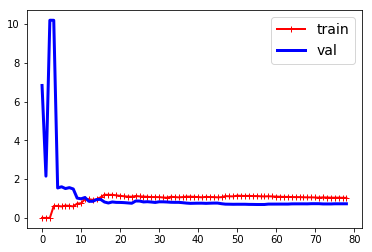

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y.reshape(-1))

# Regularized Linear Model - Ridge
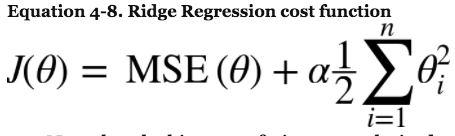

Added a new term to mininize change of model parameters which is control by hyperparamter alpha
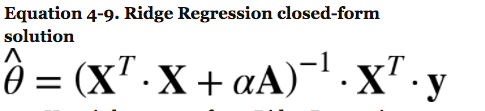
where A is Identity matrix

In [32]:
from sklearn.linear_model import Ridge
#use Cholesky to decompose inverse calculation
#ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg = Ridge(alpha=1, solver="sag", random_state=40)
ridge_reg.fit(X,y)
y_new = ridge_reg.predict(X)
print("Ridge: {0}".format(mean_squared_error(y_new, y)))
#sgd_reg = SGDRegressor(penalty="l2")
sgd_reg = SGDRegressor()
sgd_reg.fit(X, y.reshape(-1))
y_new = sgd_reg.predict(X)
print("SGD: {0}".format(mean_squared_error(y_new, y)))

ridge_reg = Ridge(alpha=1,solver="sag", random_state=41)
model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=1, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", ridge_reg),
                ])
model.fit(X,y)
y_new = model.predict(X)

print("Ridge + std_scaler: {0}".format(mean_squared_error(y_new, y)))

Ridge: 3.201197324126537
SGD: 3.78726876328147


NameError: name 'StandardScaler' is not defined

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

# Logistic regression

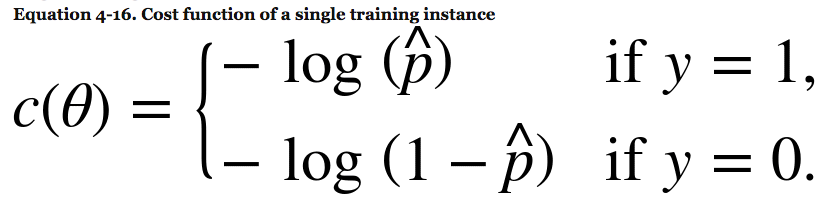
p is the probability given by the model parameters.
The above equation is from theory of information entropy
We want to reduce the entropy such that the model probaility is closed to the events

From l'hospital rule, 

where 
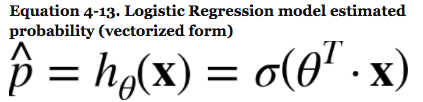

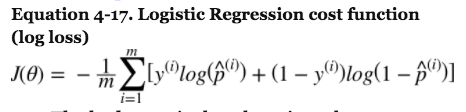

derivative:
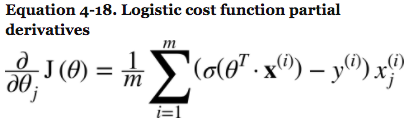

https://math.stackexchange.com/questions/477207/derivative-of-cost-function-for-logistic-regression